In [33]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
import traceback
import mne
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import ShuffleSplit, cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from mne.decoding import CSP, UnsupervisedSpatialFilter
from sklearn.decomposition import PCA
from Cho2017 import SubjectData

# data_path = 'denoise_classify_data/'

data_path = '../../../Data/mat_data'
subject_data_pickle_path = lambda n: os.path.join(data_path, 'data_{}.pkl'.format(n))
subject_ica_pickle_path = lambda n: os.path.join(data_path, 'ica_{}.pkl'.format(n))

plt.rcParams['figure.figsize'] = [12, 8]
# # Make sure ipympl is installed (via pip) for interactive plots in Jupyter 
# %matplotlib widget

In [34]:
# Parameters
ICA_SEED = 97 # Just some random seed
SPLIT_SEED = 42
n_ica_comps = 64

In [35]:
excludes = {}
with open('jaw-ica_excludes_SEED-97.pkl', 'rb') as f:
    excludes = pkl.load(f)



Subject 01
Loading ../../../Data/mat_data/data_1.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading ../../../Data/mat_data/ica_1.pkl
!! Excluding: [0]
Transforming to ICA space (64 components)
Zeroing out 1 ICA component
(122, 64, 2561)
(122,)
Imagery Train Dataset Shape: (85, 64, 2561)
Imagery Test Dataset Shape: (37, 64, 2561)
Imagery Train Labels Shape: (85,)
Imagery Test Labels Shape: (37,)
Computing rank from data with rank=None
    Using tolerance 0.00021 (2.2e-16 eps * 64 dim * 1.4e+10  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 63
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00022 (2.2e-16 eps * 64 dim * 1.6e+10  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Settin

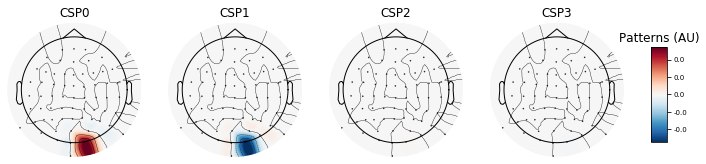



Subject 02
Loading ../../../Data/mat_data/data_2.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading ../../../Data/mat_data/ica_2.pkl
!! Excluding: [8, 0]
Transforming to ICA space (64 components)
Zeroing out 2 ICA components
(185, 64, 2561)
(185,)
Imagery Train Dataset Shape: (129, 64, 2561)
Imagery Test Dataset Shape: (56, 64, 2561)
Imagery Train Labels Shape: (129,)
Imagery Test Labels Shape: (56,)
Computing rank from data with rank=None
    Using tolerance 0.00015 (2.2e-16 eps * 64 dim * 1.1e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 62
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00015 (2.2e-16 eps * 64 dim * 1.1e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    

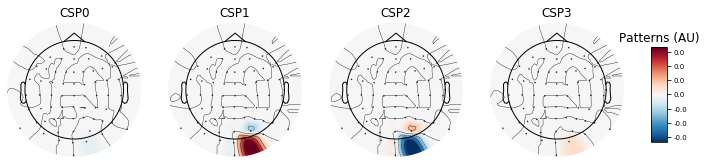



Subject 03
Loading ../../../Data/mat_data/data_3.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading ../../../Data/mat_data/ica_3.pkl
!! Excluding: [1]
Transforming to ICA space (64 components)
Zeroing out 1 ICA component
(200, 64, 2561)
(200,)
Imagery Train Dataset Shape: (140, 64, 2561)
Imagery Test Dataset Shape: (60, 64, 2561)
Imagery Train Labels Shape: (140,)
Imagery Test Labels Shape: (60,)
Computing rank from data with rank=None
    Using tolerance 0.00018 (2.2e-16 eps * 64 dim * 1.2e+10  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 63
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00016 (2.2e-16 eps * 64 dim * 1.1e+10  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Sett

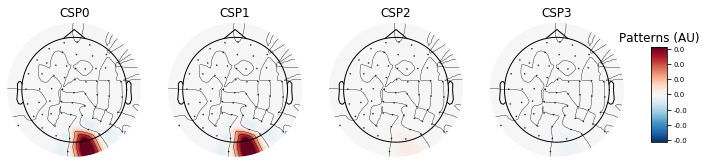



Subject 04
Loading ../../../Data/mat_data/data_4.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading ../../../Data/mat_data/ica_4.pkl
Error Subject 4


Subject 05
Loading ../../../Data/mat_data/data_5.pkl


Traceback (most recent call last):
  File "<ipython-input-36-cd1326467f11>", line 46, in <module>
    print('!! Excluding: {}'.format(excludes[subj_n][:2]))
KeyError: 4


100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading ../../../Data/mat_data/ica_5.pkl
!! Excluding: [6]
Transforming to ICA space (64 components)
Zeroing out 1 ICA component
(183, 64, 2561)
(183,)
Imagery Train Dataset Shape: (128, 64, 2561)
Imagery Test Dataset Shape: (55, 64, 2561)
Imagery Train Labels Shape: (128,)
Imagery Test Labels Shape: (55,)
Computing rank from data with rank=None
    Using tolerance 0.00025 (2.2e-16 eps * 64 dim * 1.8e+10  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 63
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00025 (2.2e-16 eps * 64 dim * 1.8e+10  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducin

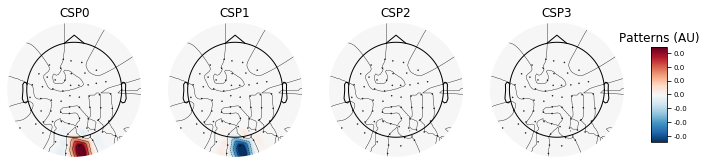



Subject 06
Loading ../../../Data/mat_data/data_6.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading ../../../Data/mat_data/ica_6.pkl
!! Excluding: [0, 2]
Transforming to ICA space (64 components)
Zeroing out 2 ICA components
(198, 64, 2561)
(198,)
Imagery Train Dataset Shape: (138, 64, 2561)
Imagery Test Dataset Shape: (60, 64, 2561)
Imagery Train Labels Shape: (138,)
Imagery Test Labels Shape: (60,)
Computing rank from data with rank=None
    Using tolerance 0.00012 (2.2e-16 eps * 64 dim * 8.7e+09  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 62
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00012 (2.2e-16 eps * 64 dim * 8.5e+09  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    

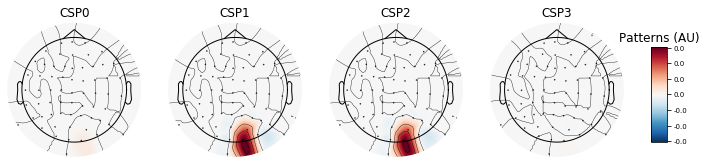



Subject 07
Loading ../../../Data/mat_data/data_7.pkl
120 events found
Event IDs: [1]
120 events found
Event IDs: [1]
Loading ../../../Data/mat_data/ica_7.pkl
!! Excluding: [0]
Transforming to ICA space (64 components)
Zeroing out 1 ICA component
(237, 64, 2561)
(237,)
Imagery Train Dataset Shape: (165, 64, 2561)
Imagery Test Dataset Shape: (72, 64, 2561)
Imagery Train Labels Shape: (165,)
Imagery Test Labels Shape: (72,)
Computing rank from data with rank=None
    Using tolerance 0.00015 (2.2e-16 eps * 64 dim * 1e+10  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 63
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00015 (2.2e-16 eps * 64 dim * 1e+10  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Setting 

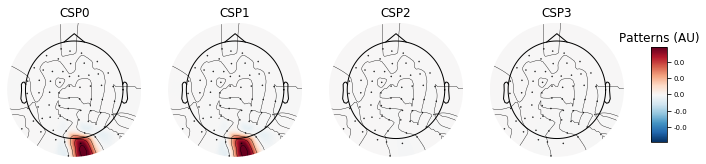



Subject 08
Loading ../../../Data/mat_data/data_8.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading ../../../Data/mat_data/ica_8.pkl
!! Excluding: [0]
Transforming to ICA space (64 components)
Zeroing out 1 ICA component
(195, 64, 2561)
(195,)
Imagery Train Dataset Shape: (136, 64, 2561)
Imagery Test Dataset Shape: (59, 64, 2561)
Imagery Train Labels Shape: (136,)
Imagery Test Labels Shape: (59,)
Computing rank from data with rank=None
    Using tolerance 0.00015 (2.2e-16 eps * 64 dim * 1.1e+10  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 63
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00015 (2.2e-16 eps * 64 dim * 1.1e+10  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Sett

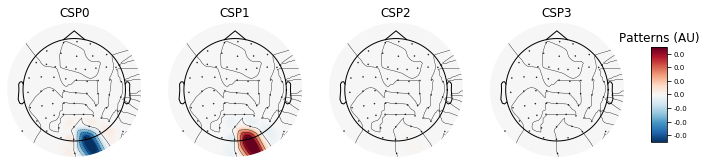



Subject 09
Loading ../../../Data/mat_data/data_9.pkl
120 events found
Event IDs: [1]
120 events found
Event IDs: [1]
Loading ../../../Data/mat_data/ica_9.pkl
Error Subject 9


Subject 10
Loading ../../../Data/mat_data/data_10.pkl


Traceback (most recent call last):
  File "<ipython-input-36-cd1326467f11>", line 46, in <module>
    print('!! Excluding: {}'.format(excludes[subj_n][:2]))
KeyError: 9


100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading ../../../Data/mat_data/ica_10.pkl
!! Excluding: [8, 1]
Transforming to ICA space (64 components)
Zeroing out 2 ICA components
(199, 64, 2561)
(199,)
Imagery Train Dataset Shape: (139, 64, 2561)
Imagery Test Dataset Shape: (60, 64, 2561)
Imagery Train Labels Shape: (139,)
Imagery Test Labels Shape: (60,)
Computing rank from data with rank=None
    Using tolerance 0.0002 (2.2e-16 eps * 64 dim * 1.4e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 62
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.0002 (2.2e-16 eps * 64 dim * 1.4e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Redu

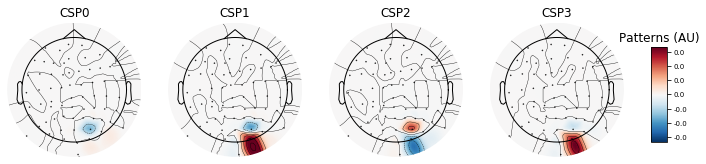



Subject 11
Loading ../../../Data/mat_data/data_11.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading ../../../Data/mat_data/ica_11.pkl
!! Excluding: [0]
Transforming to ICA space (64 components)
Zeroing out 1 ICA component
(184, 64, 2561)
(184,)
Imagery Train Dataset Shape: (128, 64, 2561)
Imagery Test Dataset Shape: (56, 64, 2561)
Imagery Train Labels Shape: (128,)
Imagery Test Labels Shape: (56,)
Computing rank from data with rank=None
    Using tolerance 0.00021 (2.2e-16 eps * 64 dim * 1.5e+10  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 63
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00021 (2.2e-16 eps * 64 dim * 1.5e+10  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Se

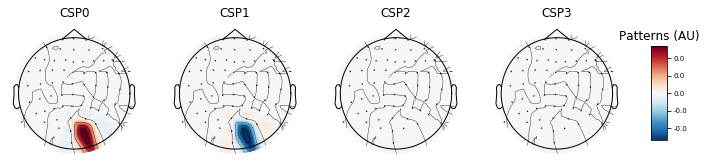



Subject 12
Loading ../../../Data/mat_data/data_12.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading ../../../Data/mat_data/ica_12.pkl
!! Excluding: [2]
Transforming to ICA space (64 components)
Zeroing out 1 ICA component
(134, 64, 2561)
(134,)
Imagery Train Dataset Shape: (93, 64, 2561)
Imagery Test Dataset Shape: (41, 64, 2561)
Imagery Train Labels Shape: (93,)
Imagery Test Labels Shape: (41,)
Computing rank from data with rank=None
    Using tolerance 0.00024 (2.2e-16 eps * 64 dim * 1.7e+10  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 63
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00029 (2.2e-16 eps * 64 dim * 2.1e+10  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Sett

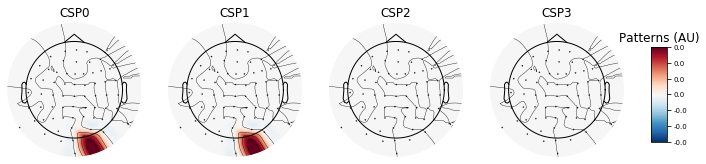



Subject 13
Loading ../../../Data/mat_data/data_13.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading ../../../Data/mat_data/ica_13.pkl
!! Excluding: [0]
Transforming to ICA space (64 components)
Zeroing out 1 ICA component
(179, 64, 2561)
(179,)
Imagery Train Dataset Shape: (125, 64, 2561)
Imagery Test Dataset Shape: (54, 64, 2561)
Imagery Train Labels Shape: (125,)
Imagery Test Labels Shape: (54,)
Computing rank from data with rank=None
    Using tolerance 0.00022 (2.2e-16 eps * 64 dim * 1.5e+10  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 63
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00021 (2.2e-16 eps * 64 dim * 1.5e+10  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Se

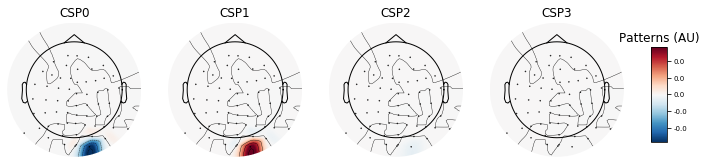



Subject 14
Loading ../../../Data/mat_data/data_14.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading ../../../Data/mat_data/ica_14.pkl
!! Excluding: [0]
Transforming to ICA space (64 components)
Zeroing out 1 ICA component
(189, 64, 2561)
(189,)
Imagery Train Dataset Shape: (132, 64, 2561)
Imagery Test Dataset Shape: (57, 64, 2561)
Imagery Train Labels Shape: (132,)
Imagery Test Labels Shape: (57,)
Computing rank from data with rank=None
    Using tolerance 0.00027 (2.2e-16 eps * 64 dim * 1.9e+10  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 63
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00027 (2.2e-16 eps * 64 dim * 1.9e+10  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Se

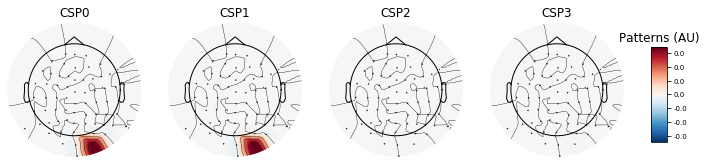



Subject 15
Loading ../../../Data/mat_data/data_15.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading ../../../Data/mat_data/ica_15.pkl
!! Excluding: [0, 3]
Transforming to ICA space (64 components)
Zeroing out 2 ICA components
(173, 64, 2561)
(173,)
Imagery Train Dataset Shape: (121, 64, 2561)
Imagery Test Dataset Shape: (52, 64, 2561)
Imagery Train Labels Shape: (121,)
Imagery Test Labels Shape: (52,)
Computing rank from data with rank=None
    Using tolerance 0.00015 (2.2e-16 eps * 64 dim * 1.1e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 62
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00014 (2.2e-16 eps * 64 dim * 9.9e+09  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
  

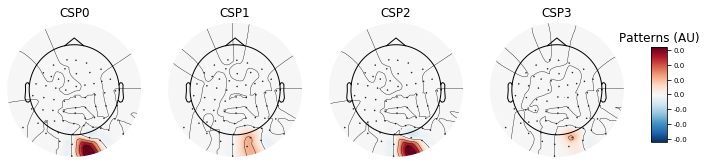



Subject 16
Loading ../../../Data/mat_data/data_16.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading ../../../Data/mat_data/ica_16.pkl
!! Excluding: [0]
Transforming to ICA space (64 components)
Zeroing out 1 ICA component
(196, 64, 2561)
(196,)
Imagery Train Dataset Shape: (137, 64, 2561)
Imagery Test Dataset Shape: (59, 64, 2561)
Imagery Train Labels Shape: (137,)
Imagery Test Labels Shape: (59,)
Computing rank from data with rank=None
    Using tolerance 0.00021 (2.2e-16 eps * 64 dim * 1.5e+10  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 63
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.0002 (2.2e-16 eps * 64 dim * 1.4e+10  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Set

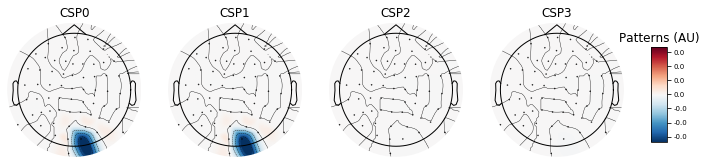



Subject 17
Loading ../../../Data/mat_data/data_17.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading ../../../Data/mat_data/ica_17.pkl
!! Excluding: [0]
Transforming to ICA space (64 components)
Zeroing out 1 ICA component
(194, 64, 2561)
(194,)
Imagery Train Dataset Shape: (135, 64, 2561)
Imagery Test Dataset Shape: (59, 64, 2561)
Imagery Train Labels Shape: (135,)
Imagery Test Labels Shape: (59,)
Computing rank from data with rank=None
    Using tolerance 0.00015 (2.2e-16 eps * 64 dim * 1.1e+10  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 63
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00015 (2.2e-16 eps * 64 dim * 1e+10  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Sett

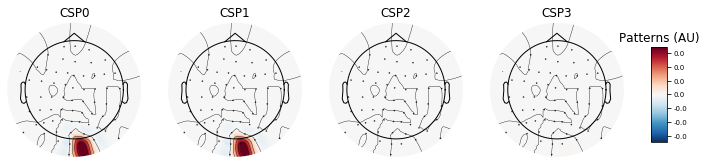



Subject 18
Loading ../../../Data/mat_data/data_18.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading ../../../Data/mat_data/ica_18.pkl
!! Excluding: [0]
Transforming to ICA space (64 components)
Zeroing out 1 ICA component
(195, 64, 2561)
(195,)
Imagery Train Dataset Shape: (136, 64, 2561)
Imagery Test Dataset Shape: (59, 64, 2561)
Imagery Train Labels Shape: (136,)
Imagery Test Labels Shape: (59,)
Computing rank from data with rank=None
    Using tolerance 0.00016 (2.2e-16 eps * 64 dim * 1.1e+10  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 63
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00015 (2.2e-16 eps * 64 dim * 1e+10  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Sett

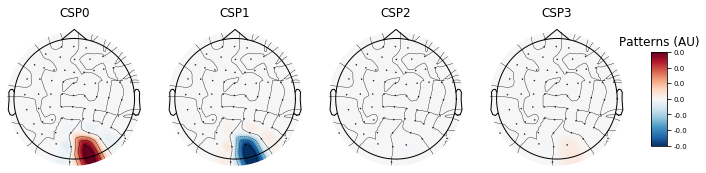



Subject 19
Loading ../../../Data/mat_data/data_19.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading ../../../Data/mat_data/ica_19.pkl
!! Excluding: [0, 2]
Transforming to ICA space (64 components)
Zeroing out 2 ICA components
(182, 64, 2561)
(182,)
Imagery Train Dataset Shape: (127, 64, 2561)
Imagery Test Dataset Shape: (55, 64, 2561)
Imagery Train Labels Shape: (127,)
Imagery Test Labels Shape: (55,)
Computing rank from data with rank=None
    Using tolerance 0.00012 (2.2e-16 eps * 64 dim * 8.8e+09  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 62
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00013 (2.2e-16 eps * 64 dim * 9.1e+09  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
  

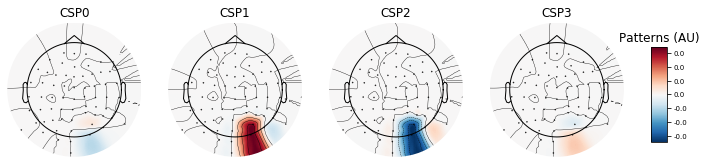



Subject 20
Loading ../../../Data/mat_data/data_20.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading ../../../Data/mat_data/ica_20.pkl
!! Excluding: [2]
Transforming to ICA space (64 components)
Zeroing out 1 ICA component
(183, 64, 2561)
(183,)
Imagery Train Dataset Shape: (128, 64, 2561)
Imagery Test Dataset Shape: (55, 64, 2561)
Imagery Train Labels Shape: (128,)
Imagery Test Labels Shape: (55,)
Computing rank from data with rank=None
    Using tolerance 0.00026 (2.2e-16 eps * 64 dim * 1.8e+10  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 63
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00026 (2.2e-16 eps * 64 dim * 1.8e+10  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Se

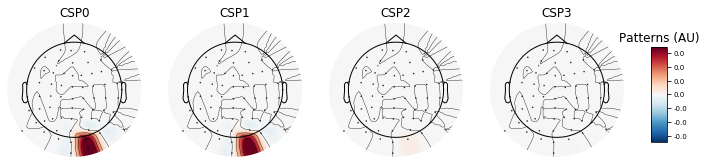



Subject 21
Loading ../../../Data/mat_data/data_21.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading ../../../Data/mat_data/ica_21.pkl
!! Excluding: [5]
Transforming to ICA space (64 components)
Zeroing out 1 ICA component
(196, 64, 2561)
(196,)
Imagery Train Dataset Shape: (137, 64, 2561)
Imagery Test Dataset Shape: (59, 64, 2561)
Imagery Train Labels Shape: (137,)
Imagery Test Labels Shape: (59,)
Computing rank from data with rank=None
    Using tolerance 0.00028 (2.2e-16 eps * 64 dim * 1.9e+10  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 63
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00024 (2.2e-16 eps * 64 dim * 1.7e+10  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Se

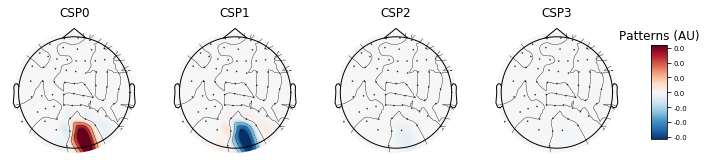



Subject 22
Loading ../../../Data/mat_data/data_22.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading ../../../Data/mat_data/ica_22.pkl
!! Excluding: [0]
Transforming to ICA space (64 components)
Zeroing out 1 ICA component
(169, 64, 2561)
(169,)
Imagery Train Dataset Shape: (118, 64, 2561)
Imagery Test Dataset Shape: (51, 64, 2561)
Imagery Train Labels Shape: (118,)
Imagery Test Labels Shape: (51,)
Computing rank from data with rank=None
    Using tolerance 0.00016 (2.2e-16 eps * 64 dim * 1.1e+10  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 63
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00015 (2.2e-16 eps * 64 dim * 1.1e+10  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Se

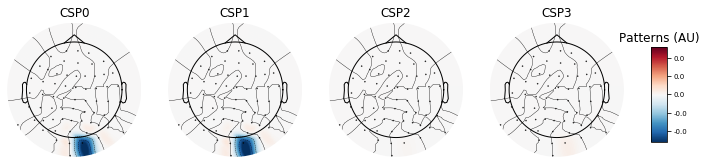



Subject 23
Loading ../../../Data/mat_data/data_23.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading ../../../Data/mat_data/ica_23.pkl
!! Excluding: [0]
Transforming to ICA space (64 components)
Zeroing out 1 ICA component
(191, 64, 2561)
(191,)
Imagery Train Dataset Shape: (133, 64, 2561)
Imagery Test Dataset Shape: (58, 64, 2561)
Imagery Train Labels Shape: (133,)
Imagery Test Labels Shape: (58,)
Computing rank from data with rank=None
    Using tolerance 0.00023 (2.2e-16 eps * 64 dim * 1.6e+10  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 63
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00022 (2.2e-16 eps * 64 dim * 1.6e+10  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Se

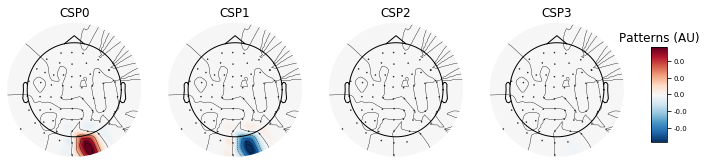



Subject 24
Loading ../../../Data/mat_data/data_24.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading ../../../Data/mat_data/ica_24.pkl
!! Excluding: [5]
Transforming to ICA space (64 components)
Zeroing out 1 ICA component
(169, 64, 2561)
(169,)
Imagery Train Dataset Shape: (118, 64, 2561)
Imagery Test Dataset Shape: (51, 64, 2561)
Imagery Train Labels Shape: (118,)
Imagery Test Labels Shape: (51,)
Computing rank from data with rank=None
    Using tolerance 0.00014 (2.2e-16 eps * 64 dim * 9.8e+09  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 63
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00013 (2.2e-16 eps * 64 dim * 9.3e+09  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Se

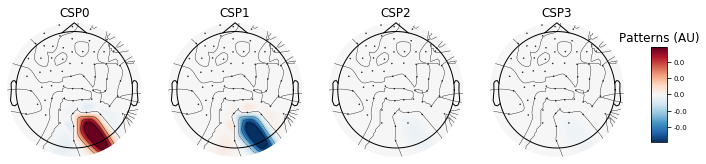



Subject 25
Loading ../../../Data/mat_data/data_25.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading ../../../Data/mat_data/ica_25.pkl
!! Excluding: [0, 1]
Transforming to ICA space (64 components)
Zeroing out 2 ICA components
(192, 64, 2561)
(192,)
Imagery Train Dataset Shape: (134, 64, 2561)
Imagery Test Dataset Shape: (58, 64, 2561)
Imagery Train Labels Shape: (134,)
Imagery Test Labels Shape: (58,)
Computing rank from data with rank=None
    Using tolerance 0.0002 (2.2e-16 eps * 64 dim * 1.4e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 62
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00019 (2.2e-16 eps * 64 dim * 1.3e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
   

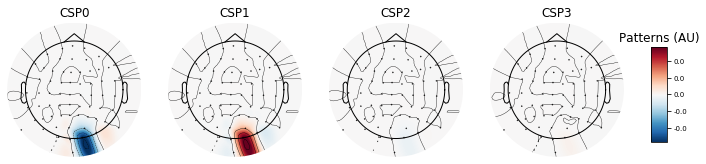



Subject 26
Loading ../../../Data/mat_data/data_26.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading ../../../Data/mat_data/ica_26.pkl
!! Excluding: [0]
Transforming to ICA space (64 components)
Zeroing out 1 ICA component
(188, 64, 2561)
(188,)
Imagery Train Dataset Shape: (131, 64, 2561)
Imagery Test Dataset Shape: (57, 64, 2561)
Imagery Train Labels Shape: (131,)
Imagery Test Labels Shape: (57,)
Computing rank from data with rank=None
    Using tolerance 0.00018 (2.2e-16 eps * 64 dim * 1.2e+10  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 63
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00018 (2.2e-16 eps * 64 dim * 1.2e+10  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Se

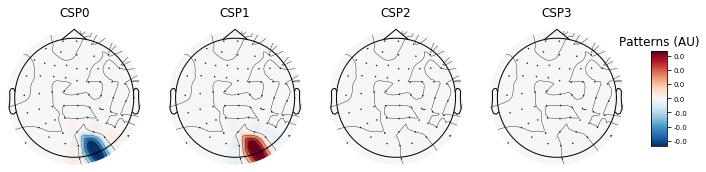



Subject 27
Loading ../../../Data/mat_data/data_27.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading ../../../Data/mat_data/ica_27.pkl
!! Excluding: [0]
Transforming to ICA space (64 components)
Zeroing out 1 ICA component
(60, 64, 2561)
(60,)
Imagery Train Dataset Shape: (42, 64, 2561)
Imagery Test Dataset Shape: (18, 64, 2561)
Imagery Train Labels Shape: (42,)
Imagery Test Labels Shape: (18,)
Computing rank from data with rank=None
    Using tolerance 7.9e-05 (2.2e-16 eps * 64 dim * 5.6e+09  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 63
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 7.2e-05 (2.2e-16 eps * 64 dim * 5.1e+09  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Settin

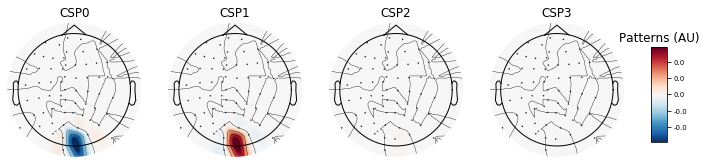



Subject 28
Loading ../../../Data/mat_data/data_28.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading ../../../Data/mat_data/ica_28.pkl
Error Subject 28


Subject 29
Loading ../../../Data/mat_data/data_29.pkl


Traceback (most recent call last):
  File "<ipython-input-36-cd1326467f11>", line 46, in <module>
    print('!! Excluding: {}'.format(excludes[subj_n][:2]))
KeyError: 28


100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading ../../../Data/mat_data/ica_29.pkl
!! Excluding: [0, 2]
Transforming to ICA space (64 components)
Zeroing out 2 ICA components
(198, 64, 2561)
(198,)
Imagery Train Dataset Shape: (138, 64, 2561)
Imagery Test Dataset Shape: (60, 64, 2561)
Imagery Train Labels Shape: (138,)
Imagery Test Labels Shape: (60,)
Computing rank from data with rank=None
    Using tolerance 0.00012 (2.2e-16 eps * 64 dim * 8.6e+09  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 62
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00012 (2.2e-16 eps * 64 dim * 8.3e+09  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Re

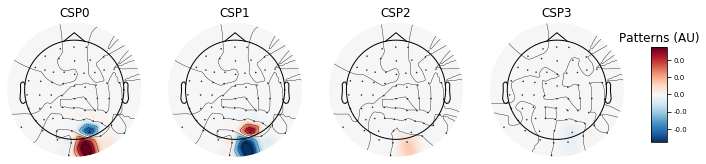



Subject 30
Loading ../../../Data/mat_data/data_30.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading ../../../Data/mat_data/ica_30.pkl
!! Excluding: [8, 0]
Transforming to ICA space (64 components)
Zeroing out 2 ICA components
(199, 64, 2561)
(199,)
Imagery Train Dataset Shape: (139, 64, 2561)
Imagery Test Dataset Shape: (60, 64, 2561)
Imagery Train Labels Shape: (139,)
Imagery Test Labels Shape: (60,)
Computing rank from data with rank=None
    Using tolerance 0.00012 (2.2e-16 eps * 64 dim * 8.6e+09  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 62
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00012 (2.2e-16 eps * 64 dim * 8.7e+09  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
  

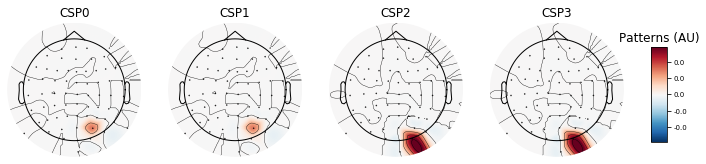



Subject 31
Loading ../../../Data/mat_data/data_31.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading ../../../Data/mat_data/ica_31.pkl
!! Excluding: [36, 55]
Transforming to ICA space (64 components)
Zeroing out 2 ICA components
(196, 64, 2561)
(196,)
Imagery Train Dataset Shape: (137, 64, 2561)
Imagery Test Dataset Shape: (59, 64, 2561)
Imagery Train Labels Shape: (137,)
Imagery Test Labels Shape: (59,)
Computing rank from data with rank=None
    Using tolerance 0.00021 (2.2e-16 eps * 64 dim * 1.5e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 62
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.0002 (2.2e-16 eps * 64 dim * 1.4e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
 

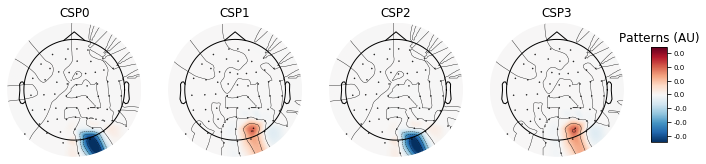



Subject 32
Loading ../../../Data/mat_data/data_32.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading ../../../Data/mat_data/ica_32.pkl
!! Excluding: [0, 3]
Transforming to ICA space (64 components)
Zeroing out 2 ICA components
(195, 64, 2561)
(195,)
Imagery Train Dataset Shape: (136, 64, 2561)
Imagery Test Dataset Shape: (59, 64, 2561)
Imagery Train Labels Shape: (136,)
Imagery Test Labels Shape: (59,)
Computing rank from data with rank=None
    Using tolerance 0.00017 (2.2e-16 eps * 64 dim * 1.2e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 62
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00016 (2.2e-16 eps * 64 dim * 1.1e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
  

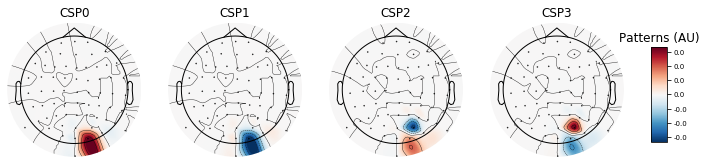



Subject 33
Loading ../../../Data/mat_data/data_33.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading ../../../Data/mat_data/ica_33.pkl
!! Excluding: [0, 1]
Transforming to ICA space (64 components)
Zeroing out 2 ICA components
Error Subject 33


Subject 34
Loading ../../../Data/mat_data/data_34.pkl


Traceback (most recent call last):
  File "<ipython-input-36-cd1326467f11>", line 52, in <module>
    im_data = UnsupervisedSpatialFilter(PCA()).fit_transform(im_data)
  File "/Users/nura/opt/anaconda3/lib/python3.7/site-packages/mne/decoding/transformer.py", line 631, in fit_transform
    return self.fit(X).transform(X)
  File "/Users/nura/opt/anaconda3/lib/python3.7/site-packages/mne/decoding/transformer.py", line 613, in fit
    self.estimator.fit(X)
  File "/Users/nura/opt/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/pca.py", line 341, in fit
    self._fit(X)
  File "/Users/nura/opt/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/pca.py", line 382, in _fit
    copy=self.copy)
  File "/Users/nura/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py", line 550, in check_array
    context))
ValueError: Found array with 0 sample(s) (shape=(0, 64)) while a minimum of 1 is required.


100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading ../../../Data/mat_data/ica_34.pkl
Error Subject 34


Subject 35
Loading ../../../Data/mat_data/data_35.pkl


Traceback (most recent call last):
  File "<ipython-input-36-cd1326467f11>", line 46, in <module>
    print('!! Excluding: {}'.format(excludes[subj_n][:2]))
KeyError: 34


100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading ../../../Data/mat_data/ica_35.pkl
!! Excluding: [0, 1]
Transforming to ICA space (64 components)
Zeroing out 2 ICA components
(200, 64, 2561)
(200,)
Imagery Train Dataset Shape: (140, 64, 2561)
Imagery Test Dataset Shape: (60, 64, 2561)
Imagery Train Labels Shape: (140,)
Imagery Test Labels Shape: (60,)
Computing rank from data with rank=None
    Using tolerance 0.00012 (2.2e-16 eps * 64 dim * 8.5e+09  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 62
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00012 (2.2e-16 eps * 64 dim * 8.7e+09  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Re

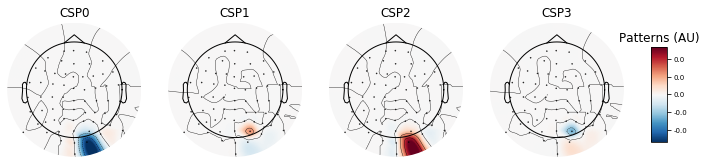



Subject 36
Loading ../../../Data/mat_data/data_36.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading ../../../Data/mat_data/ica_36.pkl
!! Excluding: [1]
Transforming to ICA space (64 components)
Zeroing out 1 ICA component
(191, 64, 2561)
(191,)
Imagery Train Dataset Shape: (133, 64, 2561)
Imagery Test Dataset Shape: (58, 64, 2561)
Imagery Train Labels Shape: (133,)
Imagery Test Labels Shape: (58,)
Computing rank from data with rank=None
    Using tolerance 0.00015 (2.2e-16 eps * 64 dim * 1.1e+10  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 63
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00015 (2.2e-16 eps * 64 dim * 1.1e+10  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Se

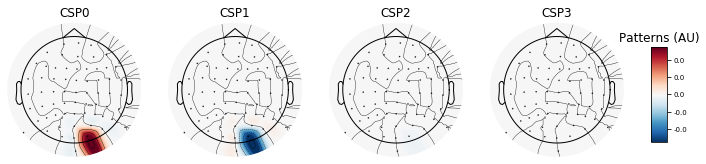



Subject 37
Loading ../../../Data/mat_data/data_37.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading ../../../Data/mat_data/ica_37.pkl
!! Excluding: [0]
Transforming to ICA space (64 components)
Zeroing out 1 ICA component
(88, 64, 2561)
(88,)
Imagery Train Dataset Shape: (61, 64, 2561)
Imagery Test Dataset Shape: (27, 64, 2561)
Imagery Train Labels Shape: (61,)
Imagery Test Labels Shape: (27,)
Computing rank from data with rank=None
    Using tolerance 9.2e-05 (2.2e-16 eps * 64 dim * 6.5e+09  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 63
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00012 (2.2e-16 eps * 64 dim * 8.2e+09  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Settin

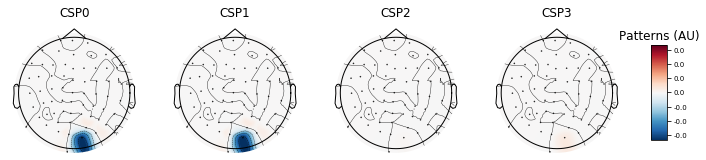



Subject 38
Loading ../../../Data/mat_data/data_38.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading ../../../Data/mat_data/ica_38.pkl
!! Excluding: [1]
Transforming to ICA space (64 components)
Zeroing out 1 ICA component
(194, 64, 2561)
(194,)
Imagery Train Dataset Shape: (135, 64, 2561)
Imagery Test Dataset Shape: (59, 64, 2561)
Imagery Train Labels Shape: (135,)
Imagery Test Labels Shape: (59,)
Computing rank from data with rank=None
    Using tolerance 0.00011 (2.2e-16 eps * 64 dim * 7.8e+09  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 63
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00012 (2.2e-16 eps * 64 dim * 8.6e+09  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Se

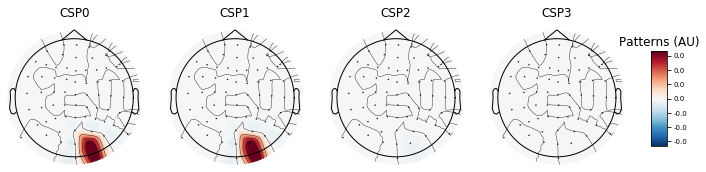



Subject 39
Loading ../../../Data/mat_data/data_39.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading ../../../Data/mat_data/ica_39.pkl
!! Excluding: [1]
Transforming to ICA space (64 components)
Zeroing out 1 ICA component
(31, 64, 2561)
(31,)
Imagery Train Dataset Shape: (21, 64, 2561)
Imagery Test Dataset Shape: (10, 64, 2561)
Imagery Train Labels Shape: (21,)
Imagery Test Labels Shape: (10,)
Computing rank from data with rank=None
    Using tolerance 9.6e-05 (2.2e-16 eps * 64 dim * 6.8e+09  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 63
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00014 (2.2e-16 eps * 64 dim * 1e+10  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Setting 

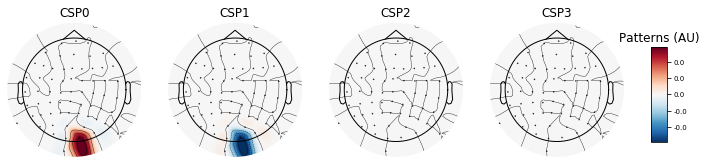



Subject 40
Loading ../../../Data/mat_data/data_40.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading ../../../Data/mat_data/ica_40.pkl
!! Excluding: [0]
Transforming to ICA space (64 components)
Zeroing out 1 ICA component
(193, 64, 2561)
(193,)
Imagery Train Dataset Shape: (135, 64, 2561)
Imagery Test Dataset Shape: (58, 64, 2561)
Imagery Train Labels Shape: (135,)
Imagery Test Labels Shape: (58,)
Computing rank from data with rank=None
    Using tolerance 0.00024 (2.2e-16 eps * 64 dim * 1.7e+10  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 63
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00024 (2.2e-16 eps * 64 dim * 1.7e+10  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Se

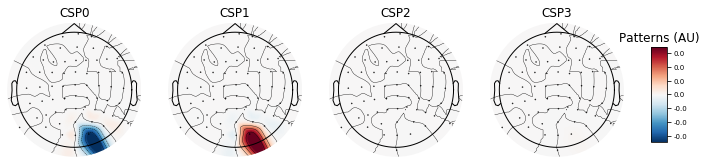



Subject 41
Loading ../../../Data/mat_data/data_41.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading ../../../Data/mat_data/ica_41.pkl
!! Excluding: [0]
Transforming to ICA space (64 components)
Zeroing out 1 ICA component
(159, 64, 2561)
(159,)
Imagery Train Dataset Shape: (111, 64, 2561)
Imagery Test Dataset Shape: (48, 64, 2561)
Imagery Train Labels Shape: (111,)
Imagery Test Labels Shape: (48,)
Computing rank from data with rank=None
    Using tolerance 0.00022 (2.2e-16 eps * 64 dim * 1.6e+10  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 63
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00024 (2.2e-16 eps * 64 dim * 1.7e+10  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Se

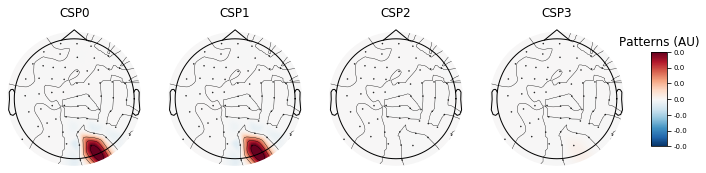



Subject 42
Loading ../../../Data/mat_data/data_42.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading ../../../Data/mat_data/ica_42.pkl
!! Excluding: [0, 9]
Transforming to ICA space (64 components)
Zeroing out 2 ICA components
(200, 64, 2561)
(200,)
Imagery Train Dataset Shape: (140, 64, 2561)
Imagery Test Dataset Shape: (60, 64, 2561)
Imagery Train Labels Shape: (140,)
Imagery Test Labels Shape: (60,)
Computing rank from data with rank=None
    Using tolerance 0.00015 (2.2e-16 eps * 64 dim * 1e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 62
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00015 (2.2e-16 eps * 64 dim * 1.1e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    

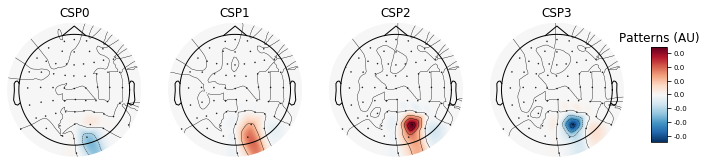



Subject 43
Loading ../../../Data/mat_data/data_43.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading ../../../Data/mat_data/ica_43.pkl
!! Excluding: [0]
Transforming to ICA space (64 components)
Zeroing out 1 ICA component
(133, 64, 2561)
(133,)
Imagery Train Dataset Shape: (93, 64, 2561)
Imagery Test Dataset Shape: (40, 64, 2561)
Imagery Train Labels Shape: (93,)
Imagery Test Labels Shape: (40,)
Computing rank from data with rank=None
    Using tolerance 0.00018 (2.2e-16 eps * 64 dim * 1.3e+10  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 63
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00019 (2.2e-16 eps * 64 dim * 1.3e+10  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Sett

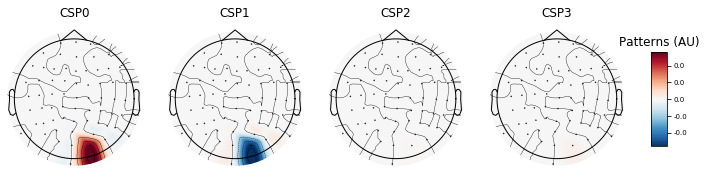



Subject 44
Loading ../../../Data/mat_data/data_44.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading ../../../Data/mat_data/ica_44.pkl
!! Excluding: [0]
Transforming to ICA space (64 components)
Zeroing out 1 ICA component
(72, 64, 2561)
(72,)
Imagery Train Dataset Shape: (50, 64, 2561)
Imagery Test Dataset Shape: (22, 64, 2561)
Imagery Train Labels Shape: (50,)
Imagery Test Labels Shape: (22,)
Computing rank from data with rank=None
    Using tolerance 0.00013 (2.2e-16 eps * 64 dim * 9.5e+09  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 63
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00015 (2.2e-16 eps * 64 dim * 1.1e+10  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Settin

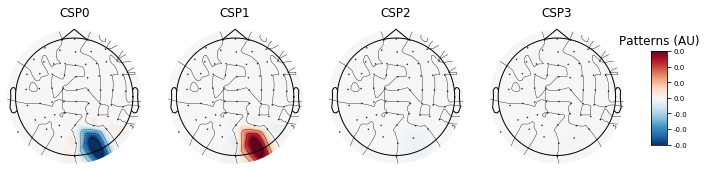



Subject 45
Loading ../../../Data/mat_data/data_45.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading ../../../Data/mat_data/ica_45.pkl
!! Excluding: [4]
Transforming to ICA space (64 components)
Zeroing out 1 ICA component
(112, 64, 2561)
(112,)
Imagery Train Dataset Shape: (78, 64, 2561)
Imagery Test Dataset Shape: (34, 64, 2561)
Imagery Train Labels Shape: (78,)
Imagery Test Labels Shape: (34,)
Computing rank from data with rank=None
    Using tolerance 0.00021 (2.2e-16 eps * 64 dim * 1.5e+10  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 63
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.0002 (2.2e-16 eps * 64 dim * 1.4e+10  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Setti

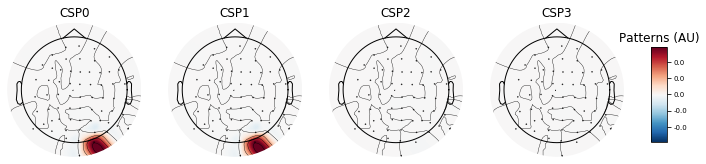



Subject 46
Loading ../../../Data/mat_data/data_46.pkl
120 events found
Event IDs: [1]
120 events found
Event IDs: [1]
Loading ../../../Data/mat_data/ica_46.pkl
!! Excluding: [1, 6]
Transforming to ICA space (64 components)
Zeroing out 2 ICA components
(226, 64, 2561)
(226,)
Imagery Train Dataset Shape: (158, 64, 2561)
Imagery Test Dataset Shape: (68, 64, 2561)
Imagery Train Labels Shape: (158,)
Imagery Test Labels Shape: (68,)
Computing rank from data with rank=None
    Using tolerance 0.0003 (2.2e-16 eps * 64 dim * 2.1e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 62
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00028 (2.2e-16 eps * 64 dim * 2e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    S

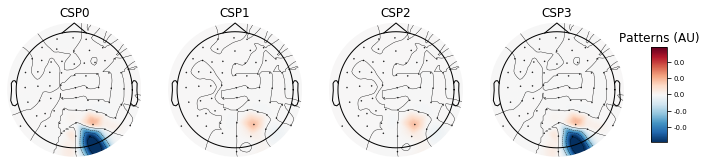



Subject 47
Loading ../../../Data/mat_data/data_47.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading ../../../Data/mat_data/ica_47.pkl
!! Excluding: [0]
Transforming to ICA space (64 components)
Zeroing out 1 ICA component
(118, 64, 2561)
(118,)
Imagery Train Dataset Shape: (82, 64, 2561)
Imagery Test Dataset Shape: (36, 64, 2561)
Imagery Train Labels Shape: (82,)
Imagery Test Labels Shape: (36,)
Computing rank from data with rank=None
    Using tolerance 0.00024 (2.2e-16 eps * 64 dim * 1.7e+10  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 63
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00024 (2.2e-16 eps * 64 dim * 1.7e+10  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Sett

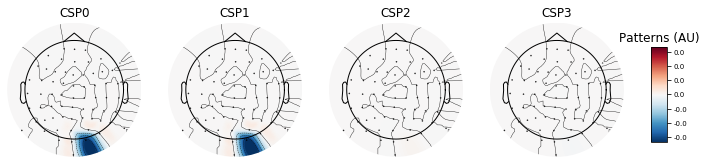



Subject 48
Loading ../../../Data/mat_data/data_48.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading ../../../Data/mat_data/ica_48.pkl
!! Excluding: [1]
Transforming to ICA space (64 components)
Zeroing out 1 ICA component
(74, 64, 2561)
(74,)
Imagery Train Dataset Shape: (51, 64, 2561)
Imagery Test Dataset Shape: (23, 64, 2561)
Imagery Train Labels Shape: (51,)
Imagery Test Labels Shape: (23,)
Computing rank from data with rank=None
    Using tolerance 0.00023 (2.2e-16 eps * 64 dim * 1.6e+10  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 63
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00024 (2.2e-16 eps * 64 dim * 1.7e+10  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Settin

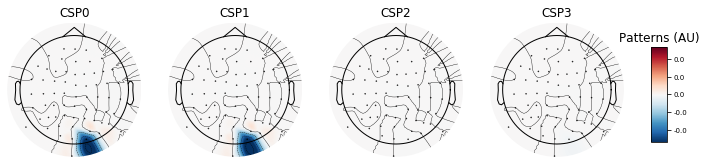



Subject 49
Loading ../../../Data/mat_data/data_49.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading ../../../Data/mat_data/ica_49.pkl
!! Excluding: [1]
Transforming to ICA space (64 components)
Zeroing out 1 ICA component
(197, 64, 2561)
(197,)
Imagery Train Dataset Shape: (137, 64, 2561)
Imagery Test Dataset Shape: (60, 64, 2561)
Imagery Train Labels Shape: (137,)
Imagery Test Labels Shape: (60,)
Computing rank from data with rank=None
    Using tolerance 0.00016 (2.2e-16 eps * 64 dim * 1.1e+10  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 63
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00016 (2.2e-16 eps * 64 dim * 1.1e+10  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Se

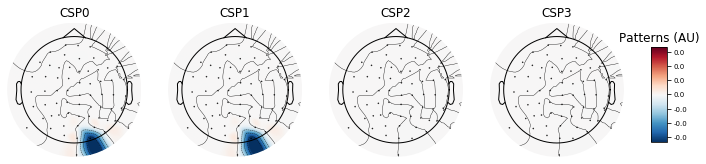



Subject 50
Loading ../../../Data/mat_data/data_50.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading ../../../Data/mat_data/ica_50.pkl
!! Excluding: [8, 1]
Transforming to ICA space (64 components)
Zeroing out 2 ICA components
(192, 64, 2561)
(192,)
Imagery Train Dataset Shape: (134, 64, 2561)
Imagery Test Dataset Shape: (58, 64, 2561)
Imagery Train Labels Shape: (134,)
Imagery Test Labels Shape: (58,)
Computing rank from data with rank=None
    Using tolerance 0.00018 (2.2e-16 eps * 64 dim * 1.3e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 62
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00018 (2.2e-16 eps * 64 dim * 1.3e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
  

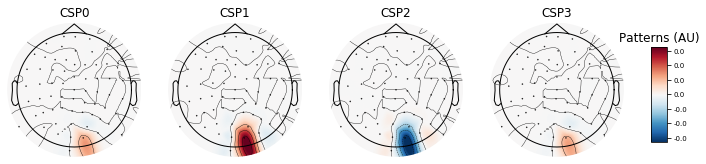



Subject 51
Loading ../../../Data/mat_data/data_51.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading ../../../Data/mat_data/ica_51.pkl
!! Excluding: [0]
Transforming to ICA space (64 components)
Zeroing out 1 ICA component
(189, 64, 2561)
(189,)
Imagery Train Dataset Shape: (132, 64, 2561)
Imagery Test Dataset Shape: (57, 64, 2561)
Imagery Train Labels Shape: (132,)
Imagery Test Labels Shape: (57,)
Computing rank from data with rank=None
    Using tolerance 0.00023 (2.2e-16 eps * 64 dim * 1.6e+10  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 63
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00022 (2.2e-16 eps * 64 dim * 1.5e+10  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Se

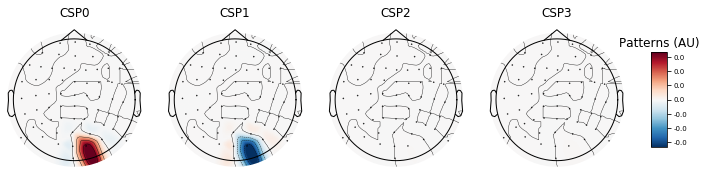



Subject 52
Loading ../../../Data/mat_data/data_52.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading ../../../Data/mat_data/ica_52.pkl
!! Excluding: [0]
Transforming to ICA space (64 components)
Zeroing out 1 ICA component
(196, 64, 2561)
(196,)
Imagery Train Dataset Shape: (137, 64, 2561)
Imagery Test Dataset Shape: (59, 64, 2561)
Imagery Train Labels Shape: (137,)
Imagery Test Labels Shape: (59,)
Computing rank from data with rank=None
    Using tolerance 0.00019 (2.2e-16 eps * 64 dim * 1.4e+10  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 63
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00019 (2.2e-16 eps * 64 dim * 1.3e+10  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Se

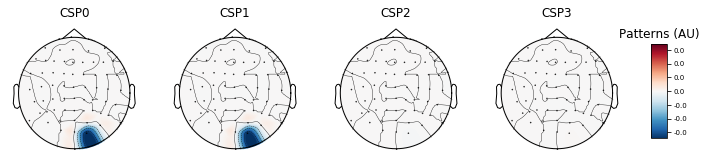

In [36]:
tmin = -1
tmax = 4
reject_criteria = {'eeg': 100e-6}       # 150 µV The default from the overview tutorial
filter_freqs = (7, 30)
filter_props = dict(picks=['eeg'], fir_design='firwin', skip_by_annotation='edge')
train_classification_accuracies = dict()
test_classification_accuracies = dict()

if not os.path.exists(data_path):
    os.mkdir(data_path)

for subj_n in range(1, 53):
    print("\n\n========================================")
    print('Subject {:02d}'.format(subj_n))
    print("========================================")
    if os.path.exists(subject_data_pickle_path(subj_n)):
        with open(subject_data_pickle_path(subj_n), 'rb') as f:
            print('Loading', subject_data_pickle_path(subj_n))
            data = pkl.load(f)
    else:
        data = SubjectData('../../../Data/mat_data/s{:02d}.mat'.format(subj_n))
        with open(subject_data_pickle_path(subj_n), 'wb') as f:
            pkl.dump(data, f)
    try:
        im_left_epochs = data.get_epochs('imagery_left', tmin=tmin, tmax=tmax, picks=['eeg'], filter_freqs=(1, None), reject_criteria=None, verbose=False)
        im_right_epochs = data.get_epochs('imagery_right', tmin=tmin, tmax=tmax, picks=['eeg'], filter_freqs=(1, None), reject_criteria=None, verbose=False)
        # Set left events to 0 to have 2 distinct class labels (left: 0 and right: 1)
        im_left_epochs.events[:, -1] = 0
        im_left_epochs.event_id = {'0': 0}

        joint_im_epochs = mne.concatenate_epochs([im_left_epochs.copy(), im_right_epochs.copy()], add_offset=True)
        
        
        if os.path.exists(subject_ica_pickle_path(subj_n)):
            with open(subject_ica_pickle_path(subj_n), 'rb') as f:
                print('Loading', subject_ica_pickle_path(subj_n))
                ica_joint = pkl.load(f)
        else:
            ica_joint = mne.preprocessing.ICA(n_components=n_ica_comps, random_state=ICA_SEED, max_iter=1000)
            ica_joint.fit(joint_im_epochs)
            with open(subject_ica_pickle_path(subj_n), 'wb') as f:
                print('Writing', subject_ica_pickle_path(subj_n))
                pkl.dump(ica_joint, f)
            
        
        print('!! Excluding: {}'.format(excludes[subj_n][:2]))
        ica_joint.exclude = excludes[subj_n][:2]
        ica_joint.apply(joint_im_epochs)
        joint_im_epochs.filter(*filter_freqs, **filter_props).drop_bad(reject_criteria)
        im_labels = joint_im_epochs.events[:, -1]
        im_data = joint_im_epochs.get_data()
        im_data = UnsupervisedSpatialFilter(PCA()).fit_transform(im_data)      

        print(im_data.shape)
        print(im_labels.shape)

        X_train, X_test, Y_train, Y_test = train_test_split(im_data, im_labels, test_size = 0.3, 
                                                          random_state=SPLIT_SEED)

        print('Imagery Train Dataset Shape:', X_train.shape)
        print('Imagery Test Dataset Shape:', X_test.shape)
        print('Imagery Train Labels Shape:', Y_train.shape)
        print('Imagery Test Labels Shape:', Y_test.shape)

        cv = ShuffleSplit(10, test_size=0.2, random_state=SPLIT_SEED)
        cv_split = cv.split(im_data)

        lda = LinearDiscriminantAnalysis()
        csp = CSP(n_components=4, reg=None, log=True, norm_trace=False)
        clf = Pipeline([('CSP', csp), ('LDA', lda)])

        cross_val_scores = cross_val_score(clf, X_train, Y_train, cv=cv, n_jobs=8)
        clf.fit(X_train, Y_train)
        Y_pred_train = clf.predict(X_train)
        Y_pred_test = clf.predict(X_test)

        train_scores = accuracy_score(Y_train, Y_pred_train, normalize=True)
        test_scores = accuracy_score(Y_test, Y_pred_test, normalize=True)
        train_classification_accuracies[subj_n] = train_scores
        test_classification_accuracies[subj_n] = test_scores

        train_class_balance = np.mean(Y_train == Y_train[0])
        train_class_balance = max(train_class_balance, 1. - train_class_balance)
        test_class_balance = np.mean(Y_test == Y_test[0])
        test_class_balance = max(test_class_balance, 1. - test_class_balance)

        print("Cross Validation accuracy: %f" % (np.mean(cross_val_scores)))
        print("Train Classification accuracy: %f, Test Classification accuracy: %f" 
            % (train_scores, test_scores))
        print("Train Data Chance level: %f" % (train_class_balance))
        print("Test Data Chance level: %f" % (test_class_balance))
        _ = csp.fit_transform(im_data, im_labels)

        csp.plot_patterns(joint_im_epochs.copy().pick_types(eeg=True).info, ch_type='eeg',
                  units='Patterns (AU)', size=1.5)
    except Exception as e:
        sys.stdout.flush()
        print('Error Subject {}'.format(subj_n))
        traceback.print_exc()
        train_classification_accuracies[subj_n] = 0
        test_classification_accuracies[subj_n] = 0

In [37]:
with open('train_classification_accuracies_jaw_denoise.pkl', 'wb') as output:
    pkl.dump(train_classification_accuracies, output)
with open('test_classification_accuracies_jaw_denoise.pkl', 'wb') as output:
    pkl.dump(test_classification_accuracies, output)

In [38]:
import collections
train_classification_accuracies = {k:v*100 for k, v in train_classification_accuracies.items()}
test_classification_accuracies = {k:v*100 for k, v in test_classification_accuracies.items()}

ordered_train_classification_accuracies = collections.OrderedDict(sorted(train_classification_accuracies.items()))
ordered_test_classification_accuracies = collections.OrderedDict(sorted(test_classification_accuracies.items()))

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 15]

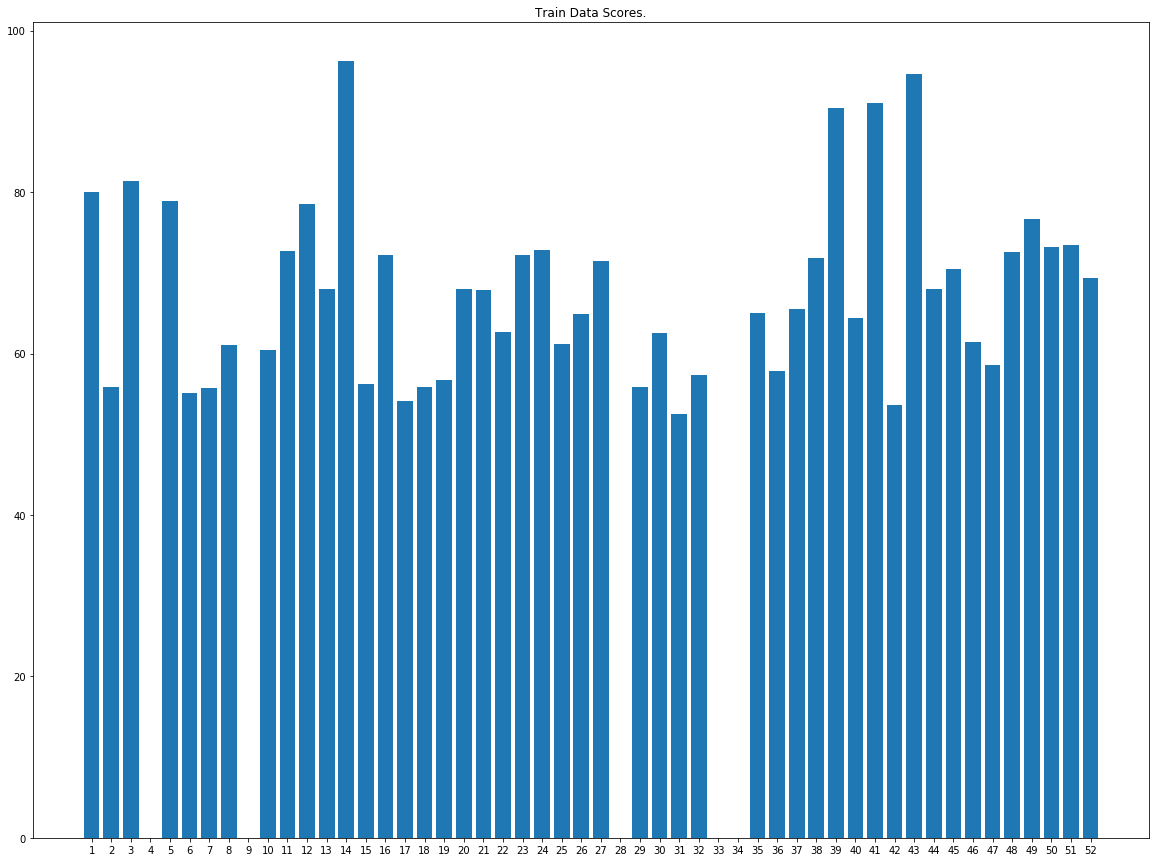

In [40]:
# New Result
plt.bar(range(len(train_classification_accuracies)), list(ordered_train_classification_accuracies.values()), align='center')
plt.xticks(range(len(train_classification_accuracies)), list(ordered_train_classification_accuracies.keys()))
plt.title("Train Data Scores.")
plt.savefig('train_scores_jaw_denoise.png')
plt.show()

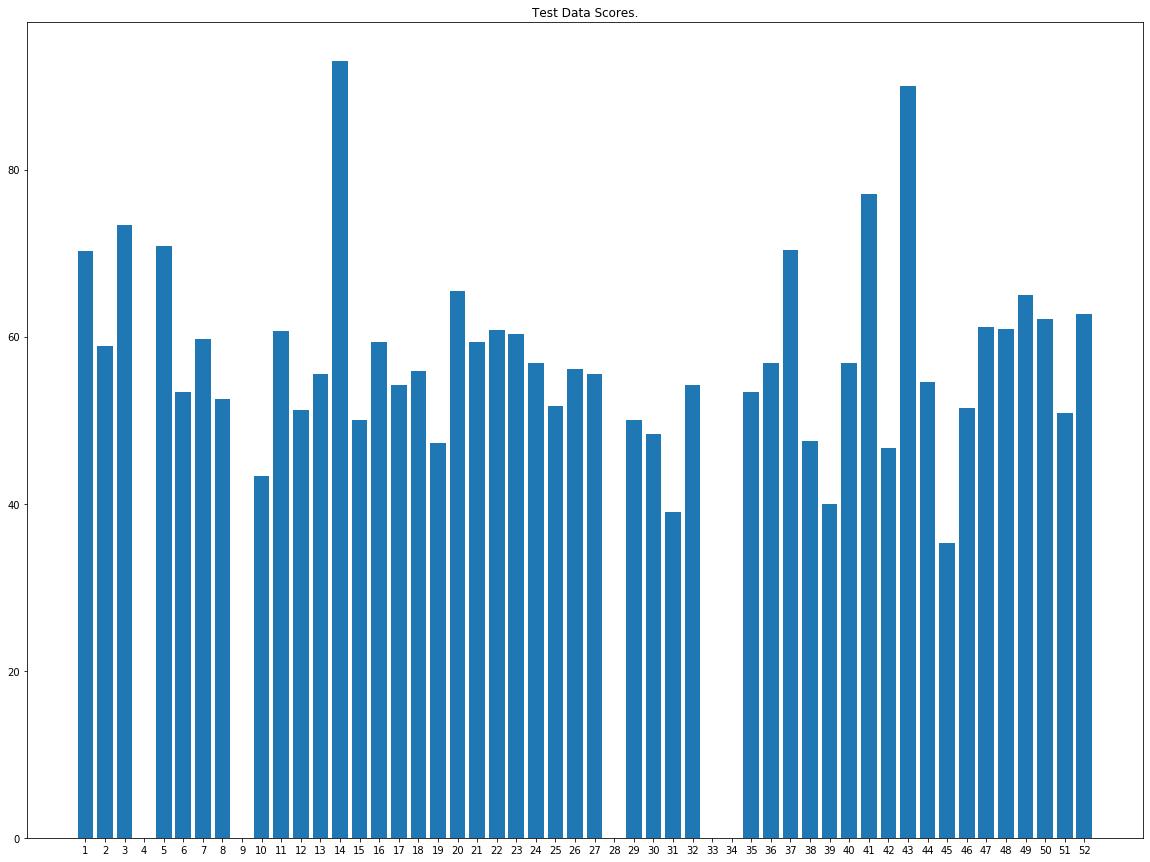

In [41]:
# New Result
plt.bar(range(len(test_classification_accuracies)), list(ordered_test_classification_accuracies.values()), align='center')
plt.xticks(range(len(test_classification_accuracies)), list(ordered_test_classification_accuracies.keys()))
plt.title("Test Data Scores.")
plt.savefig('test_scores_jaw_denoise.png')
plt.show()